# FastWOE Styled Display Demo

This notebook demonstrates the rich HTML rendering capabilities of FastWOE for Jupyter notebooks.

Features:

- Beautiful styled tables with clean design
- Color-coded cells based on values
- Significance highlighting
- Professional styling with Inter font family
- Decorator-based styling for clean, reusable code


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from fastwoe import FastWoe
from fastwoe.display import iv_styled, styled
from fastwoe.metrics import plot_performance

## 1. Generate Sample Data


In [2]:
# Generate synthetic credit risk data
np.random.seed(42)

prevalence = 0.05

X, y = make_classification(
    n_samples=5000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    weights=[1 - prevalence, prevalence],  # Imbalanced like real credit data
    random_state=42,
)

# Create DataFrame with meaningful feature names
feature_names = [
    "income",
    "age",
    "employment_length",
    "debt_to_income",
    "credit_history",
    "loan_amount",
    "num_accounts",
    "utilization_rate",
    "payment_history",
    "inquiries",
]

X_df = pd.DataFrame(X, columns=feature_names)
y_series = pd.Series(y, name="default")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_series, test_size=0.3, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")
print(f"Default rate: {y.mean():.2%}")

Training samples: 3500
Test samples: 1500
Default rate: 5.52%


## 2. Fit FastWOE Model


In [3]:
# Initialize and fit WOE encoder
woe = FastWoe()
woe.fit(X_train, y_train)

# Transform data
X_train_woe = woe.transform(X_train)
X_test_woe = woe.transform(X_test)

print("✓ FastWOE model fitted successfully!")

✓ FastWOE model fitted successfully!


## 3. Information Value Analysis with @iv_styled Decorator

The `@iv_styled` decorator automatically applies IV analysis styling:


In [4]:
@iv_styled
def get_iv_analysis():
    """Get IV analysis with automatic styling."""
    return woe.get_iv_analysis()


# Automatically returns styled output
get_iv_analysis()

feature,iv,iv_se,iv_ci_lower,iv_ci_upper,iv_significance,n_categories,gini
inquiries,1.8697,0.2454,1.3888,2.3507,Significant,8,0.5942
income,1.6458,0.2527,1.1505,2.1411,Significant,8,0.5293
num_accounts,0.9174,0.1618,0.6003,1.2345,Significant,8,0.4244
age,0.7046,0.1361,0.4378,0.9713,Significant,8,0.3639
loan_amount,0.5733,0.1265,0.3254,0.8212,Significant,7,0.3545
debt_to_income,0.3490,0.1453,0.0642,0.6337,Significant,6,0.2265
utilization_rate,0.2998,0.1360,0.0334,0.5663,Significant,7,0.1495
credit_history,0.1999,0.1079,0.0000,0.4113,Not Significant,5,0.1280
employment_length,0.1551,0.0827,0.0000,0.3171,Not Significant,6,0.1084
payment_history,0.1374,0.0839,0.0000,0.3018,Not Significant,7,0.0933


## 4. Top Features with @styled Decorator

Use `@styled` decorator for custom styling:


In [5]:
@styled(
    title="Top 5 Features by Information Value",
    subtitle="Highest predictive power features",
    highlight_cols=["iv", "gini"],
    precision=4,
)
def get_top_features(n=5):
    """Get top N features by IV."""
    iv_df = woe.get_iv_analysis()
    return iv_df.nlargest(n, "iv")[["feature", "iv", "gini", "iv_se"]]


get_top_features(n=5)

feature,iv,gini,iv_se
inquiries,1.8697,0.5942,0.2454
income,1.6458,0.5293,0.2527
num_accounts,0.9174,0.4244,0.1618
age,0.7046,0.3639,0.1361
loan_amount,0.5733,0.3545,0.1265


## 5. WOE Mappings for Top Features


In [6]:
@styled(
    title="WOE Mapping: {feature}",
    subtitle="Weight of Evidence transformation for each category",
    highlight_cols=["woe", "iv"],
    precision=4,
)
def get_woe_mapping(feature):
    """Get WOE mapping for a specific feature."""
    mappings = woe.get_all_mappings()[feature]
    return pd.DataFrame(mappings)


# Get top 3 features
top_features = woe.get_iv_analysis().nlargest(3, "iv")["feature"].tolist()

for feature in top_features:

    @styled(
        title=f"WOE Mapping: {feature}",
        subtitle="Weight of Evidence transformation for each category",
        highlight_cols=["woe", "iv"],
        precision=4,
    )
    def show_mapping(feat=feature):  # ← Bind loop variable as default argument
        mappings = woe.get_all_mappings()[feat]
        return pd.DataFrame(mappings)

    display(show_mapping())

category,count,count_pct,good_count,bad_count,event_rate,woe,woe_se,woe_ci_lower,woe_ci_upper
"(-0.0, -0.0]",2,0.0571,0,2,1.0000,15.1039,1.0000,13.1439,17.0639
"(-0.0, 1.2]",657,18.7714,594,63,0.0959,0.5974,0.1325,0.3377,0.8571
"(-2.0, -0.0]",1740,49.7143,1696,44,0.0253,-0.8107,0.1527,-1.1100,-0.5114
"(-∞, -2.0]",802,22.9143,796,6,0.0075,-2.0467,0.4098,-2.8499,-1.2436
"(1.2, 1.2]",6,0.1714,2,4,0.6667,3.5342,0.8660,1.8369,5.2316
"(1.2, 2.5]",243,6.9429,195,48,0.1975,1.4393,0.1611,1.1235,1.7551
"(2.5, 3.9]",46,1.3143,24,22,0.4783,2.7541,0.2952,2.1756,3.3326
"(3.9, ∞)",4,0.1143,0,4,1.0000,15.7970,1.1547,13.5339,18.0602


category,count,count_pct,good_count,bad_count,event_rate,woe,woe_se,woe_ci_lower,woe_ci_upper
"(-1.1, -1.1]",2,0.0571,0,2,1.0000,15.1039,1.0000,13.1439,17.0639
"(-1.1, 0.1]",474,13.5429,438,36,0.0759,0.3424,0.1734,0.0026,0.6822
"(-3.6, -1.1]",348,9.9429,283,65,0.1868,1.3700,0.1375,1.1005,1.6396
"(-3.6, -3.6]",4,0.1143,0,4,1.0000,15.7970,1.1547,13.5339,18.0602
"(-∞, -3.6]",35,1.0000,18,17,0.4857,2.7839,0.3382,2.1211,3.4468
"(0.1, 0.1]",2,0.0571,0,2,1.0000,15.1039,1.0000,13.1439,17.0639
"(0.1, 1.5]",863,24.6571,830,33,0.0382,-0.3838,0.1775,-0.7317,-0.0359
"(1.5, ∞)",1772,50.6286,1738,34,0.0192,-1.0930,0.1732,-1.4324,-0.7536


category,count,count_pct,good_count,bad_count,event_rate,woe,woe_se,woe_ci_lower,woe_ci_upper
"(-0.8, -0.8]",1,0.0286,0,1,1.0000,14.4108,1.0000,12.4508,16.3707
"(-0.8, 0.0]",260,7.4286,239,21,0.0808,0.4092,0.2276,-0.0369,0.8553
"(-4.0, -0.8]",1736,49.6000,1667,69,0.0397,-0.3436,0.1229,-0.5844,-0.1028
"(-∞, -4.0]",1017,29.0571,997,20,0.0197,-1.0679,0.2258,-1.5105,-0.6253
"(0.0, 0.1]",8,0.2286,4,4,0.5000,2.8411,0.7071,1.4552,4.2270
"(0.1, 6.1]",467,13.3429,396,71,0.1520,1.1224,0.1289,0.8698,1.3750
"(6.1, 6.2]",2,0.0571,0,2,1.0000,15.1039,1.0000,13.1439,17.0639
"(6.2, ∞)",9,0.2571,4,5,0.5556,3.0642,0.6708,1.7495,4.3790


## 6. Model Performance Summary


Dataset,Samples,Default Rate,Gini Coefficient,AUC
Training,3500,0.0551,0.5293,0.7646
Test,1500,0.0553,0.4042,0.7021


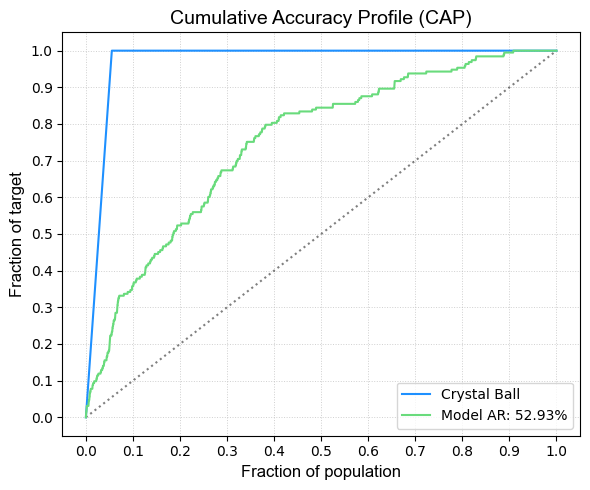

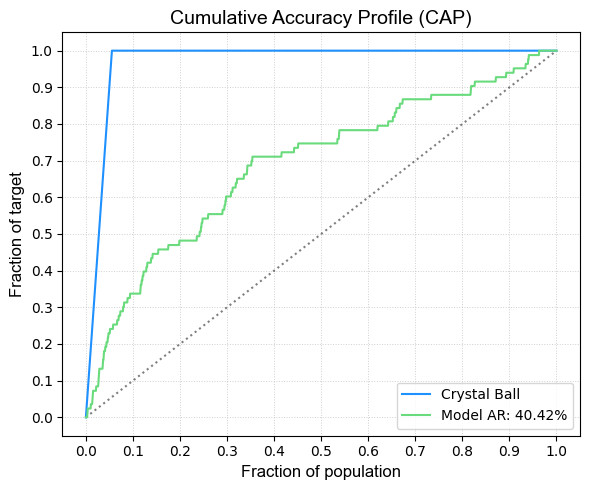

In [7]:
@styled(
    title="Model Performance Summary",
    subtitle="Logistic Regression with WOE features",
    highlight_cols=["Gini Coefficient", "AUC"],
    precision=4,
)
def get_performance_summary():
    """Calculate and display model performance metrics."""
    # Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_woe, y_train)

    # Get predictions
    y_pred_train = model.predict_proba(X_train_woe)[:, 1]
    y_pred_test = model.predict_proba(X_test_woe)[:, 1]

    # Calculate metrics
    _, _, gini_train = plot_performance(y_train, y_pred_train, show_plot=False)
    _, _, gini_test = plot_performance(y_test, y_pred_test, show_plot=False)

    # Create summary
    return pd.DataFrame(
        {
            "Dataset": ["Training", "Test"],
            "Samples": [len(y_train), len(y_test)],
            "Default Rate": [y_train.mean(), y_test.mean()],
            "Gini Coefficient": [gini_train, gini_test],
            "AUC": [(1 + gini_train) / 2, (1 + gini_test) / 2],
        }
    )


get_performance_summary()

## 7. Feature Importance Ranking


In [8]:
@styled(
    title="Feature Importance Ranking",
    subtitle="Sorted by absolute coefficient magnitude",
    highlight_cols=["Abs_Coefficient", "IV"],
    precision=4,
)
def get_feature_importance():
    """Calculate feature importance from model coefficients."""
    # Train model
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_woe, y_train)

    # Get IV analysis
    iv_df = woe.get_iv_analysis()

    return pd.DataFrame(
        {
            "Feature": feature_names,
            "Coefficient": model.coef_[0],
            "Abs_Coefficient": np.abs(model.coef_[0]),
            "IV": [iv_df[iv_df["feature"] == f]["iv"].values[0] for f in feature_names],
        }
    ).sort_values("Abs_Coefficient", ascending=False)


get_feature_importance()

Feature,Coefficient,Abs_Coefficient,IV
debt_to_income,-0.2121,0.2121,0.3490
age,0.0695,0.0695,0.7046
num_accounts,0.0592,0.0592,0.9174
inquiries,0.0552,0.0552,1.8697
utilization_rate,-0.0518,0.0518,0.2998
payment_history,-0.0482,0.0482,0.1374
loan_amount,0.0227,0.0227,0.5733
income,0.0188,0.0188,1.6458
credit_history,-0.0058,0.0058,0.1999
employment_length,0.0030,0.0030,0.1551


## 8. Model Comparison


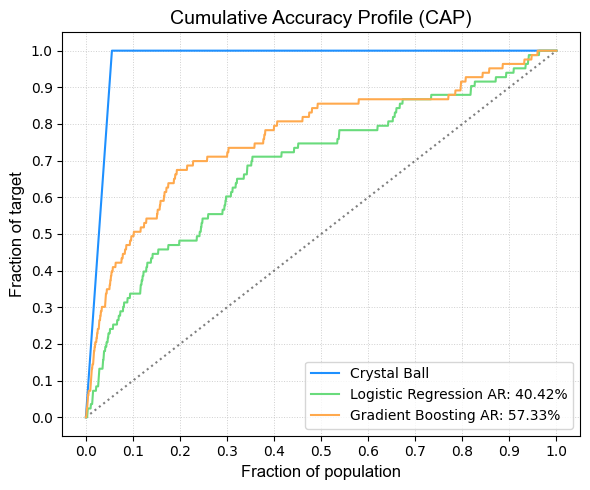

Model,Test Gini
Logistic Regression,0.4042
Gradient Boosting,0.5733


In [ ]:
# Train models and get predictions
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=50),
}

predictions = []
model_names = []

for name, model in models.items():
    model.fit(X_train_woe, y_train)
    y_pred_test = model.predict_proba(X_test_woe)[:, 1]
    predictions.append(y_pred_test)
    model_names.append(name)

# Plot all models on one chart with custom colors
custom_colors = ["#69db7c", "#ffa94d"]

fig, ax, ginis = plot_performance(
    y_true=y_test,
    y_pred=predictions,
    labels=model_names,
    colors=custom_colors,
)


# Create styled comparison table
@styled(
    title="Model Comparison",
    subtitle="Performance metrics on test set",
    highlight_cols=["Test Gini"],
    precision=4,
)
def show_comparison():
    results = []
    results.extend(
        {"Model": name, "Test Gini": gini} for name, gini in zip(model_names, ginis)
    )
    return pd.DataFrame(results)


show_comparison()

## 9. Risk Segmentation Analysis


In [10]:
@styled(
    title="Risk Segmentation Analysis",
    subtitle="Portfolio breakdown by risk score",
    highlight_cols=["Default Rate %", "Expected Loss"],
    precision=2,
)
def get_risk_segments():
    """Create risk segmentation table."""
    return pd.DataFrame(
        {
            "Segment": ["Very Low", "Low", "Medium", "High", "Very High"],
            "Score Range": ["0-200", "200-400", "400-600", "600-800", "800-1000"],
            "Population %": [0.15, 0.25, 0.30, 0.20, 0.10],
            "Default Rate %": [0.02, 0.05, 0.12, 0.25, 0.45],
            "Avg Exposure": [5000, 8000, 12000, 15000, 10000],
            "Expected Loss": [100, 400, 1440, 3750, 4500],
        }
    )


get_risk_segments()

Segment,Score Range,Population %,Default Rate %,Avg Exposure,Expected Loss
Very Low,0-200,0.15,0.02,5000,100
Low,200-400,0.25,0.05,8000,400
Medium,400-600,0.30,0.12,12000,1440
High,600-800,0.20,0.25,15000,3750
Very High,800-1000,0.10,0.45,10000,4500


## 10. Binning Summary with Decorator

Example showing WOE binning statistics:


In [11]:
@styled(
    title="WOE Binning Summary",
    subtitle="Bin statistics for top feature",
    highlight_cols=["woe", "iv"],
    precision=4,
)
def get_binning_summary():
    """Get binning summary for the top feature."""
    # Get top feature by IV
    top_feature = woe.get_iv_analysis().nlargest(1, "iv")["feature"].values[0]

    # Get binning summary
    summary = woe.get_binning_summary()
    return summary[summary["feature"] == top_feature]


get_binning_summary()

feature,values,n_bins,missing,method,monotonic_constraint
inquiries,3500,8,0,tree,0


## 11. Dark Mode Example - IV Analysis

The same data can be displayed with dark mode styling:


In [12]:
@styled(
    title="Information Value Analysis (Dark Mode)",
    subtitle="Feature importance with dark theme",
    highlight_cols=["iv", "gini"],
    precision=4,
    theme="dark",
)
def get_iv_dark():
    """Get IV analysis with dark mode styling."""
    return woe.get_iv_analysis()


get_iv_dark()

feature,iv,iv_se,iv_ci_lower,iv_ci_upper,iv_significance,n_categories,gini
inquiries,1.8697,0.2454,1.3888,2.3507,Significant,8,0.5942
income,1.6458,0.2527,1.1505,2.1411,Significant,8,0.5293
num_accounts,0.9174,0.1618,0.6003,1.2345,Significant,8,0.4244
age,0.7046,0.1361,0.4378,0.9713,Significant,8,0.3639
loan_amount,0.5733,0.1265,0.3254,0.8212,Significant,7,0.3545
debt_to_income,0.3490,0.1453,0.0642,0.6337,Significant,6,0.2265
utilization_rate,0.2998,0.1360,0.0334,0.5663,Significant,7,0.1495
credit_history,0.1999,0.1079,0.0000,0.4113,Not Significant,5,0.1280
employment_length,0.1551,0.0827,0.0000,0.3171,Not Significant,6,0.1084
payment_history,0.1374,0.0839,0.0000,0.3018,Not Significant,7,0.0933


## 12. Dark Mode Example - Model Comparison

Model comparison table with dark mode:


In [13]:
@styled(
    title="Model Comparison (Dark Mode)",
    subtitle="Performance metrics with dark theme",
    highlight_cols=["Test Gini"],
    precision=4,
    theme="dark",
)
def show_comparison_dark():
    results = []
    for name, gini in zip(model_names, ginis):
        results.append({"Model": name, "Test Gini": gini})
    return pd.DataFrame(results)


show_comparison_dark()

Model,Test Gini
Logistic Regression,0.4042
Gradient Boosting,0.5733


## Summary

The `fastwoe.display` module provides:

- **@styled** - Decorator for custom DataFrame styling with full control
- **@iv_styled** - Decorator for automatic IV analysis styling
- **StyledDataFrame** - Direct wrapper for any DataFrame
- **style_iv_analysis()** - Function-based IV analysis styling
- **style_woe_mapping()** - Function-based WOE mapping styling
- **Gradient highlighting** - Automatic color coding based on values
- **Custom precision** - Control decimal places
- **Titles & subtitles** - Add context to your tables
- **Theme support** - Both light and dark modes based on baseline foundation design

### Why Use Decorators?

- **Cleaner code** - No need to wrap DataFrames manually
- **Reusable** - Define styling once, use everywhere
- **Flexible** - Customize per function with theme parameter
- **Automatic** - Functions return styled output seamlessly

### Theme Options

- **Light mode** (default): Clean white/gray backgrounds (#FCFCFC, #F0F0F0, #E8E8E8)
- **Dark mode**: Dark backgrounds based on baseline foundation (#0B0B0B, #161616, #222222)

All styled outputs work seamlessly in Jupyter notebooks while maintaining plain text representation for console/terminal use.
